# Qutip Single Qubit error
In this notebook, we charecterise the error generated by qutip sesolve() method and integerate.ode method. The example done in here can be found in "A Modern Approach to Quantum Mechanics," Section 4.3. F

## Time Independent Case

irst we discuss the time independent Hamiltonian. The Hamiltonian is defined as:
\begin{equation}
    H = w_0 \sigma_z
\end{equation}

The unitary is:
\begin{equation}
U(t) = e^{-i\hat Ht/h} = e^{-i\hat \sigma_z w_0 t/h} = e^{-i\hat \sigma_z \phi/h} =  R(\phi \hat k) = \begin{bmatrix}
            e^{-i\phi/h} & 0\\
            0 & e^{i \phi/h} 
        \end{bmatrix} = 
        \begin{bmatrix}
            e^{-iw_0 t/2} & 0\\
            0 & e^{i w_0 t/2} 
        \end{bmatrix}
\end{equation}
### Exact Solution

The initial state of the system is the state $|+\rangle = \frac{1}{\sqrt{2}}(|0\rangle + |1\rangle)= \ \frac{1}{\sqrt{2}}\begin{bmatrix}1 \\
1\end{bmatrix}$. 
The evolution equation is then: 
\begin{equation}
    \begin{bmatrix}
        y_0(t) \\
        y_1(t)
    \end{bmatrix} = \frac{1}{\sqrt2}
    \begin{bmatrix}
        e^{-iw_0 t/2} & 0\\
        0 & e^{i w_0 t/2} 
    \end{bmatrix}
    \begin{bmatrix}
        1 \\
        1
    \end{bmatrix}
\end{equation}

The following code will generate the state of the system at 0.1 seconds interval between 0 and 10 seconds.



In [9]:
import matplotlib.pyplot as plt
import numpy as np
from qutip import *

from scipy.integrate import ode

# for analytical exponentiation
from scipy.linalg import expm 
print("done")

done


Simulation Parameters:

In [18]:
w = 1
times = []
t = 0
dt = 0.1
max_time = 10
while t < max_time-dt:
    times.append(t)
    t = t + dt

In [11]:
initial_state = (1/np.sqrt(2))*np.array([[1], [1]])
w = 1
exact_states = []
for t in times:
    unitary = np.array([[np.exp(-1j*w*t/2), 0], [0, np.exp(1j*w*t/2) ]])
    exact_states.append(np.matmul(unitary, initial_state))
print("done generating exact solution")

done generating exact solution


### Qutip Simulation 

In [12]:
initial_state = (qutip.basis(2, 0) + (1+0j)*qutip.basis(2, 1)).unit()
h = w*sigmaz()
result = sesolve(h, initial_state, times)
qutip_states = result.states
print("done generating qutip solution")
# err = []
# for i in range(100):
#     err.append(ode_states[i] - qutip_states[i])
    
# print(err)


done generating qutip solution


### Integerate.ode simulation

Integerate.ode will estimate the value of a function given its derivative in a similar way to Euler's method. So, we must supply $\frac{dy}{dt}$. $\frac{dy}{dt}$ in this case is $\frac{dU}{dt} = \begin{bmatrix}
            \frac{-iw_0}{2}e^{-iw_0 t/2} & 0\\
            0 & \frac{iw_0}{2}e^{i w_0 t/2} 
        \end{bmatrix} $. 
        
The evolution equation should look like:
\begin{equation}
\phi(t) = \phi(0) + \begin{bmatrix}
            \frac{-iw_0}{2}e^{-iw_0 t/2} & 0\\
            0 & \frac{iw_0}{2}e^{i w_0 t/2} 
        \end{bmatrix}dt
\end{equation}
or
\begin{equation}
\phi(t)_0 = \phi(0)_0 + \frac{-iw_0}{2\sqrt(2)}e^{-iw_0 t/2} dt
\end{equation}
\begin{equation}
\phi(t)_1 = \phi(0)_1 + \frac{iw_0}{2\sqrt(2)}e^{-iw_0 t/2} dt
\end{equation}

In [13]:
def dy_dt(t, y):
    return np.array([[-1j*w*y[0]], [1j*w*y[1]]])


initial_state = (1/np.sqrt(2))*np.array([[1], [1]])
t0 = 0

# set the integrater
r = ode(dy_dt).set_integrator('zvode' )
r.set_initial_value(initial_state, t0)

ode_states = [initial_state]
ts = [t0]
while r.successful() and r.t < max_time - dt - 0.01:# here added the 0.01 because of machine precision as rt would 9.899
                                                    # which is less than 9.9 so it will loop one more time producing an 
                                                    # extra unnecessery point
    ode_states.append(r.integrate(r.t + dt))
    ts.append(r.t)
print("done generating integerate.ode solution")

done generating integerate.ode solution


## Error Analysis
Here, we display the error analysis for the time independent case. The error is defined as the amplitude of the difference between matching vectors at each time step. 


In [14]:
qutip_error = []
ode_error = []
for i in range(len(times)):
    y = []
    y.append(qutip_states[i][0] - exact_states[i][0])
    y.append(qutip_states[i][1] - exact_states[i][1])
    qutip_error.append(np.abs(np.vdot(y, y)))
    ode_error.append(np.abs(np.vdot(ode_states[i] - exact_states[i], ode_states[i] - exact_states[i])))
print("done finding error")

done finding error


Text(0.5, 1.0, 'Error in sesolve() and Integerate.ode for time-independent hamiltonian for one qubit ')

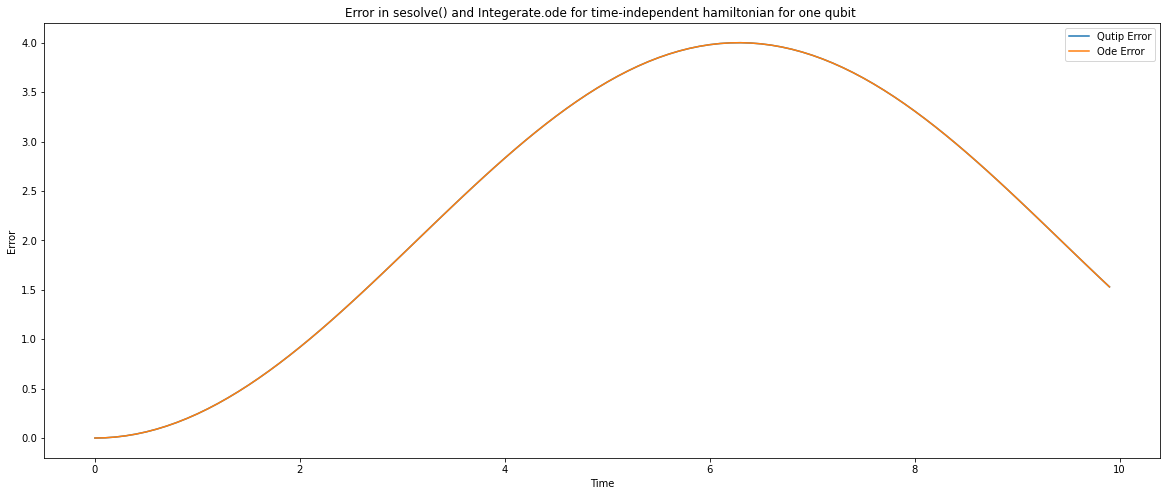

In [16]:
p = plt.figure(1)
p.set_figwidth(20)
p.set_figheight(8)
p = plt.subplot()
p.plot(times, qutip_error) 
p.plot(times, ode_error)
p.legend(("Qutip Error", "Ode Error",))
p.set_xlabel('Time') 
p.set_ylabel('Error') 
p.set_title("Error in sesolve() and Integerate.ode for time-independent hamiltonian for one qubit ")

In [ ]:
r = 50
print(exact_states[r+1])
print(qutip_states[r])
print(ode_states[r])
print(exact_states[r] - ode_states[r])
print(np.vdot(exact_states[r] - ode_states[r], exact_states[r] - ode_states[r]))